<a href="https://colab.research.google.com/github/shubhamshuklaa/deep_learning/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#importing libvs
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#getting the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-01-20 21:33:01--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-01-20 21:33:01 (27.7 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [24]:
#loading data
data=pd.read_csv('moore.csv', header=None).to_numpy()

In [25]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [26]:
X = data[:,0].reshape(-1, 1)
Y = data[:,1]


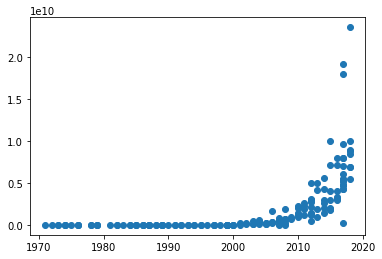

In [27]:
plt.scatter(X,Y)

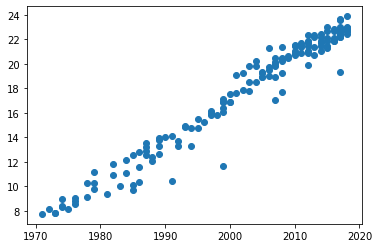

In [28]:
Y=np.log(Y)
plt.scatter(X,Y)

In [29]:
X=X-X.mean()


In [30]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [31]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse',
)

In [32]:
def schedule(epoch, lr):
  if epoch>+50:
    return 0.0001
  return 0.001

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

In [33]:
r=model.fit(X,Y,epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 345.1605 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 361.4475 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 241.9073 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 205.1626 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 178.2403 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 140.9082 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 106.5248 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 76.9942 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 55.9376 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 44.5834 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 

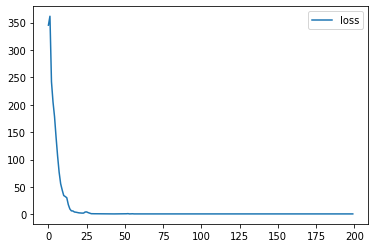

In [34]:
#plotting the loss
plt.plot(r.history['loss'],label='loss')
plt.legend()

In [36]:
model.layers

In [37]:
model.layers[0].get_weights()

[array([[0.34513834]], dtype=float32), array([17.77033], dtype=float32)]

In [41]:
a=model.layers[0].get_weights()[0][0,0]

In [43]:
print('time to double:', np.log(2)/a)

time to double: 2.0083169495837514


In [45]:
X=X.flatten()
denominator=X.dot(X)-X.mean()*X.sum()
a=( X.dot(Y)-Y.mean()*X.sum() )/denominator
b=(Y.mean()*X.dot(X)-X.mean()*X.dot(Y))/ denominator
print(a,b)

0.341682487387313 17.764939393631764


In [46]:
print('time to double:', np.log(2)/a)

time to double: 2.0286295205239204
